In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [43]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [44]:
def naive(P,Q):
    def diff(vec_x, vec_y, dim_x, dim_y):
        #difference_between_all_coordinates from two vecotrs x and y
        
        # helper_matrix_1 looks like this [ one-column-x-vector one-column-1-vecotr ]
        # dimenzions of the helper_matrix_1 are (dim_x, 2)
        helper_matrix_1 = np.transpose(np.array([vec_x, np.ones(dim_x)]))
        
        # helper_matrix_2 looks like this [ one-row-1-vector, (-1)* one-row-y-vecotr ]
        # dimenzions of the helper_matrix_2 are (2, dim_y)
        helper_matrix_2 = np.array([np.ones(dim_y), (-1)*vec_y])
        
        # difference between any two points is just the dot product of two matrices
        # resulting in matrix with dimenzions (dim_x, dim_y), what we needed at the first place
        return np.dot(helper_matrix_1, helper_matrix_2)
    p_dim, q_dim = np.shape(P)[0], np.shape(Q)[0]
    p_x, p_y = np.transpose(P)[0], np.transpose(P)[1]
    q_x, q_y = np.transpose(Q)[0], np.transpose(Q)[1]
    return np.sqrt(diff(p_x,q_x,p_dim,q_dim)**2+diff(p_y,q_y,p_dim,q_dim)**2)

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [45]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [46]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [47]:
def with_indices(p, q):
    dim_p = np.shape(p)[0]
    dim_q = np.shape(q)[0]
    res = np.zeros([dim_p,dim_q])
    for p_it,i in zip(p, range(dim_p)):
        for q_it,j in zip(q, range(dim_q)):
            res[i][j] = np.sqrt((p_it[0] - q_it[0])**2 + (p_it[1] - q_it[1])**2)
    return res

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [48]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [49]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [50]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

236 µs ± 37.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
217 ms ± 57.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.17 ms ± 50.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.7 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


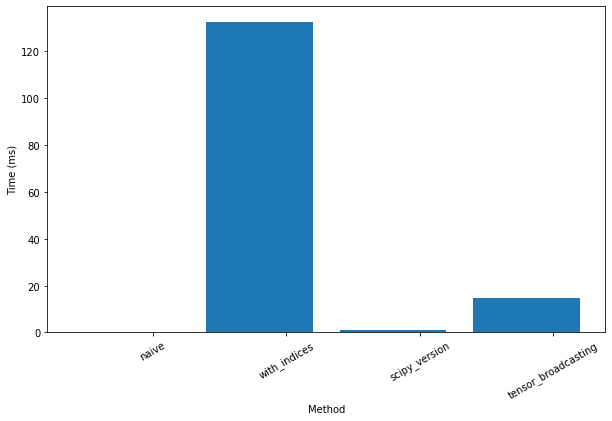

In [51]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()